In [1]:
import numpy as np  # numerical library
import xarray as xr  # netCDF library

import matplotlib.pyplot as plt  # plotting library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list

import cftime

In [2]:
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [7]:
data_dir='/data/shareddata/Climatologias/Glorys/cmems_mod_glo_phy_my_0.083_P1M-m/NC/'

In [8]:
files = []
for iy in range(2000,2021):
    for im in range(1,13):
        files.append(data_dir+"mercatorglorys12v1_gl12_mean_%04d%02d.nc"%(iy,im))

In [9]:
data = xr.open_mfdataset(files)

In [10]:
data

<xarray.Dataset> Size: 4TB
Dimensions:    (longitude: 4320, latitude: 2041, depth: 50, time: 252)
Coordinates:
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * latitude   (latitude) float32 8kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 2kB 2000-01-16T12:00:00 ... 2020-12-16T1...
Data variables:
    mlotst     (time, latitude, longitude) float64 18GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    zos        (time, latitude, longitude) float64 18GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    bottomT    (time, latitude, longitude) float64 18GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    sithick    (time, latitude, longitude) float64 18GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    siconc     (time, latitude, longitude) float64 18GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    usi        (time, latitude, longitude) float64 18GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    vsi        (time, latitude, longitude) float64 18GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    thetao     (time, depth, latitude, longitude) float64 889GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
    so         (time, depth, latitude, longitude) float64 889GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
    uo         (time, depth, latitude, longitude) float64 889GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
    vo         (time, depth, latitude, longitude) float64 889GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
Attributes: (12/14)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    area:                          GLOBAL
    product:                       GLOBAL_REANALYSIS_001_030
    dataset:                       global-reanalysis-001-030-monthly
    source:                        MERCATOR GLORYS12V1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...

In [11]:
GL = data.drop_vars("mlotst").drop_vars("zos")
GL = GL.drop_vars("sithick").drop_vars("siconc")
GL = GL.drop_vars("usi").drop_vars("vsi").drop_vars("uo").drop_vars("vo").drop_vars("bottomT")

In [12]:
GL

<xarray.Dataset> Size: 2TB
Dimensions:    (longitude: 4320, latitude: 2041, depth: 50, time: 252)
Coordinates:
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * latitude   (latitude) float32 8kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 2kB 2000-01-16T12:00:00 ... 2020-12-16T1...
Data variables:
    thetao     (time, depth, latitude, longitude) float64 889GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
    so         (time, depth, latitude, longitude) float64 889GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
Attributes: (12/14)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    area:                          GLOBAL
    product:                       GLOBAL_REANALYSIS_001_030
    dataset:                       global-reanalysis-001-030-monthly
    source:                        MERCATOR GLORYS12V1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...

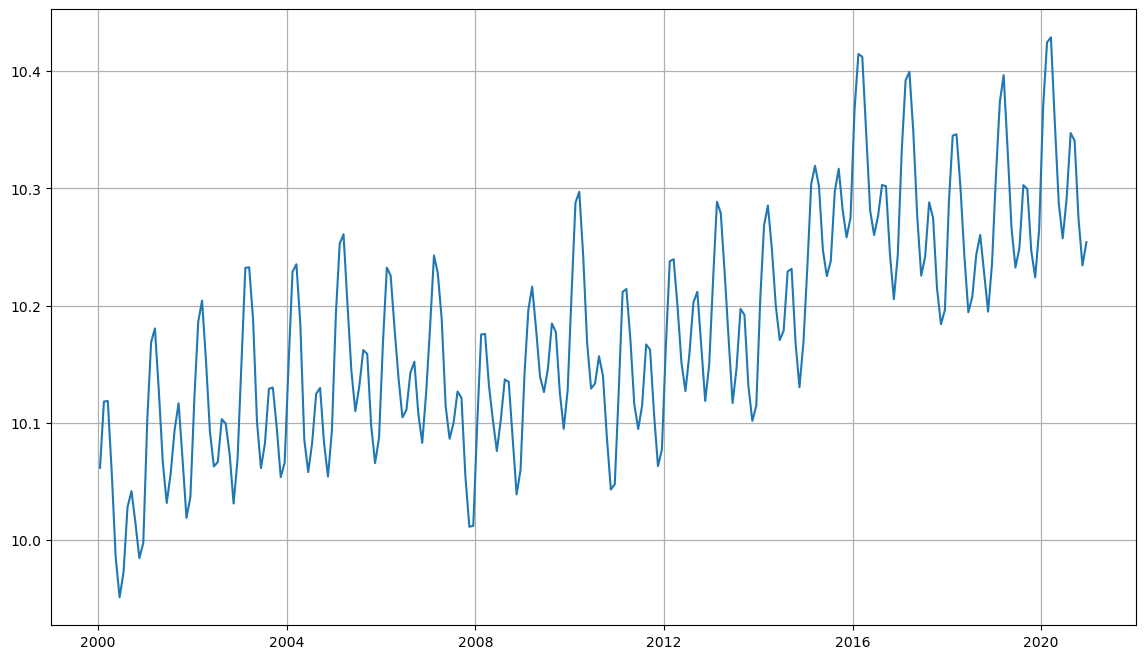

In [13]:
fig, ax = plt.subplots(1 , 1 , figsize = (14,8))
ax.plot(GL.time,
        GL.thetao.mean(dim='latitude').mean(dim='longitude').sel(depth=slice(0,2000)).mean('depth'))
ax.grid(linestyle='-', linewidth=.9);

In [17]:
GL.to_netcdf('./Data/GLORYS_Global_'+str(GL.time[0].dt.strftime('%Y-%m').values)+'_'+str(GL.time[-1].dt.strftime('%Y-%m').values)+'.nc')

KeyboardInterrupt: 